<a href="https://colab.research.google.com/github/anas-mohd/cat-vs-dog-classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 174MB/s]
100% 1.06G/1.06G [00:05<00:00, 219MB/s]


In [ ]:
import zipfile


In [ ]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 74s 105ms/step - loss: 1.3237 - accuracy: 0.6004 - val_loss: 0.7308 - val_accuracy: 0.6498
Epoch 2/20
625/625 [==============================] - 64s 102ms/step - loss: 0.5636 - accuracy: 0.7217 - val_loss: 0.6058 - val_accuracy: 0.7026
Epoch 3/20
625/625 [==============================] - 64s 101ms/step - loss: 0.4869 - accuracy: 0.7756 - val_loss: 0.7235 - val_accuracy: 0.6474
Epoch 4/20
625/625 [==============================] - 66s 105ms/step - loss: 0.4209 - accuracy: 0.8082 - val_loss: 0.5291 - val_accuracy: 0.7434
Epoch 5/20
625/625 [==============================] - 63s 101ms/step - loss: 0.3474 - accuracy: 0.8481 - val_loss: 0.4768 - val_accuracy: 0.7770
Epoch 6/20
625/625 [==============================] - 64s 101ms/step - loss: 0.2814 - accuracy: 0.8767 - val_loss: 0.5506 - val_accuracy: 0.7752
Epoch 7/20
625/625 [==============================] - 67s 106ms/step - loss: 0.2118 - accuracy: 0.9099 - val_loss: 0.5677 - val_ac

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import argparse
import time
import cv2

In [ ]:
test_img=cv2.imread('/content/cat-468232_1280.jpg')

In [ ]:
test_img=cv2.imread('/content/pexels-helena-lopes-2253275.jpg')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

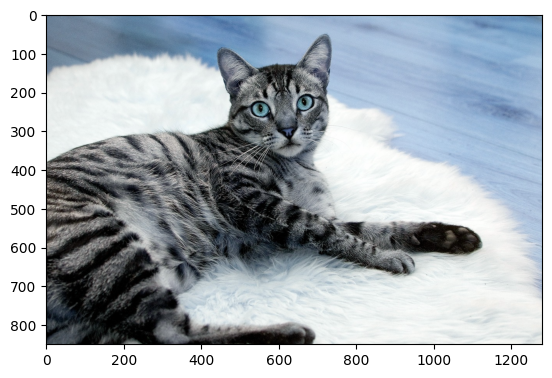

In [ ]:
img=cv.imread('/content/cat-468232_1280.jpg')

plt.imshow(img)

In [ ]:
test_img.shape

(3505, 5257, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 33ms/step


array([[0.]], dtype=float32)